# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2021
## Дополнительное домашнее задание 1. Байесовские оценки и АБ тестирование
### Дедлайн --- 21 декабря 9:00


In [3]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import colors
import seaborn as sns

from scipy import stats as sps
sns.set(style="darkgrid", font_scale=1.4)

## Задача 1 (20 баллов)

Байесовская оценка для распределения Бернулли то есть бета-распределение.

а) Оценка параметра 

Сгенерируйте выборки из распределения Бернулли размера $200$ с параметрами $0.3,\ 0.5,\ 0.9$. 

In [60]:
SAMPLE_SIZE = 200
SEED = 42

thetas = [0.3, 0.5, 0.9]

bern_samples = sps.bernoulli(thetas).rvs(size=(SAMPLE_SIZE, 3), random_state=SEED).T

Реализуйте метод `get_estimator` класса `BayesEstimator` который возвращает байесовскую оценку (распределения) для данной выборки. Учтите что в `__init__` указаны параметры априорного распределения.

In [61]:
class BayesEstimator:
    def __init__(self, prior_alpha: float = 1, prior_beta: float = 1):
        self._prior_alpha = prior_alpha
        self._prior_beta = prior_beta

    def get_estimator(self, sample: np.ndarray):
        assert sample.ndim == 1
        
        alpha = sample.sum() + self._prior_alpha
        beta = sample.size - sample.sum() + self._prior_beta
        
        posterior = sps.beta(alpha, beta)
        return posterior

Для каждой выборки создайте свой экземпляр класса `BayesEstimator`. Для каждого $n \leq 200$ постройте график плотности апостериорного распределения соответствующего цвета. Также зафиксируйте среднее и $\alpha/2$ и $(1 - \alpha/2)$ квантили, $\alpha=0.05$ для всех вышеупомянутых $n$. Они вам понадобятся в следующем пункте.

In [62]:
means = np.zeros((3, SAMPLE_SIZE))
lower_bound = np.zeros((3, SAMPLE_SIZE))
upper_bound = np.zeros((3, SAMPLE_SIZE))
alpha = 0.05

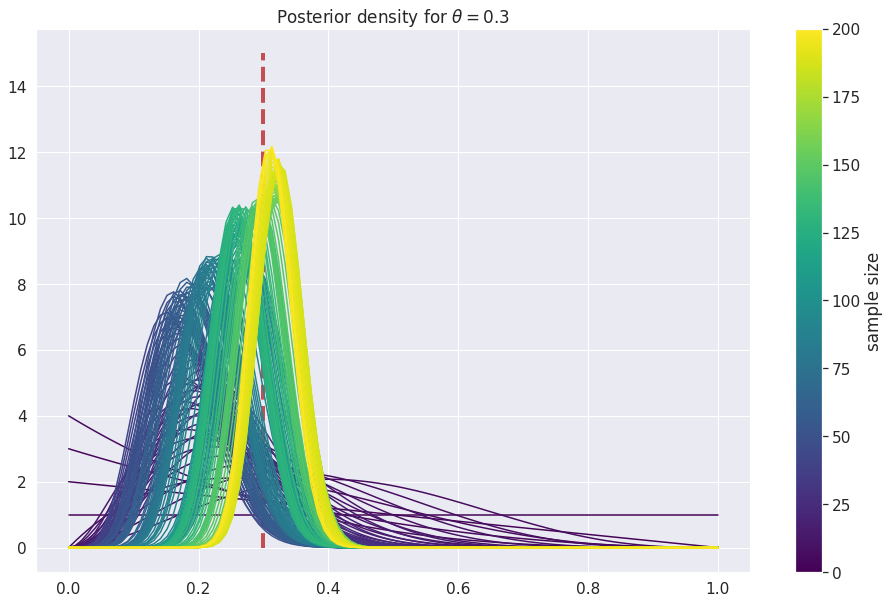

In [63]:
x = np.linspace(0, 1, 100)

palette = sns.color_palette("viridis", n_colors=SAMPLE_SIZE)
plt.figure(figsize=(16, 10))
be = BayesEstimator()
for i in range(bern_samples.shape[-1]):
    estimator = be.get_estimator(bern_samples[0][:i])
    apost_sample = estimator.pdf(x)
    plt.plot(x, apost_sample, color=palette[i])
    
    means[0, i] = estimator.mean()
    lower_bound[0, i] = estimator.ppf(alpha/2)
    upper_bound[0, i] = estimator.ppf(1 - alpha/2)

norm = colors.Normalize(0, SAMPLE_SIZE)

plt.colorbar(cm.ScalarMappable(norm=norm, cmap="viridis"), label="sample size")
plt.title(r"Posterior density for $\theta = 0.3$")
plt.vlines(0.3, 0, 15, linestyle="dashed", colors="r", linewidth=4)
plt.show()

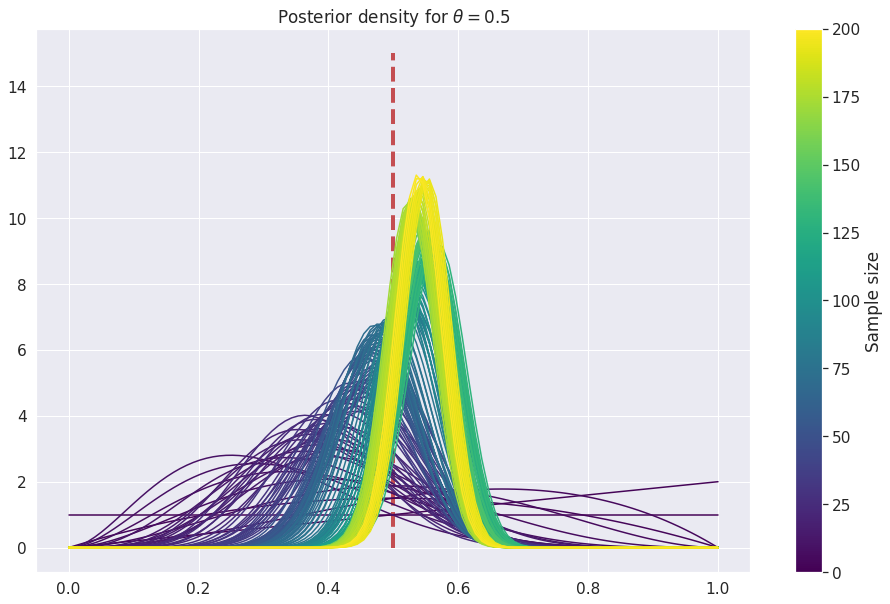

In [65]:
x = np.linspace(0, 1, 100)
sns.set(style="darkgrid", font_scale=1.4)
palette = sns.color_palette("viridis", n_colors=SAMPLE_SIZE)
plt.figure(figsize=(16, 10))
be = BayesEstimator()
for i in range(bern_samples.shape[-1]):
    estimator = be.get_estimator(bern_samples[1][:i])
    apost_sample = estimator.pdf(x)
    plt.plot(x, apost_sample, color=palette[i])
    
    means[1, i] = estimator.mean()
    lower_bound[1, i] = estimator.ppf(alpha/2)
    upper_bound[1, i] = estimator.ppf(1 - alpha/2)
    
norm = colors.Normalize(0, SAMPLE_SIZE)

plt.colorbar(cm.ScalarMappable(norm=norm, cmap="viridis"), label="Sample size")
plt.title(r"Posterior density for $\theta = 0.5$")
plt.vlines(0.5, 0, 15, linestyle="dashed", colors="r", linewidth=4)
plt.show()

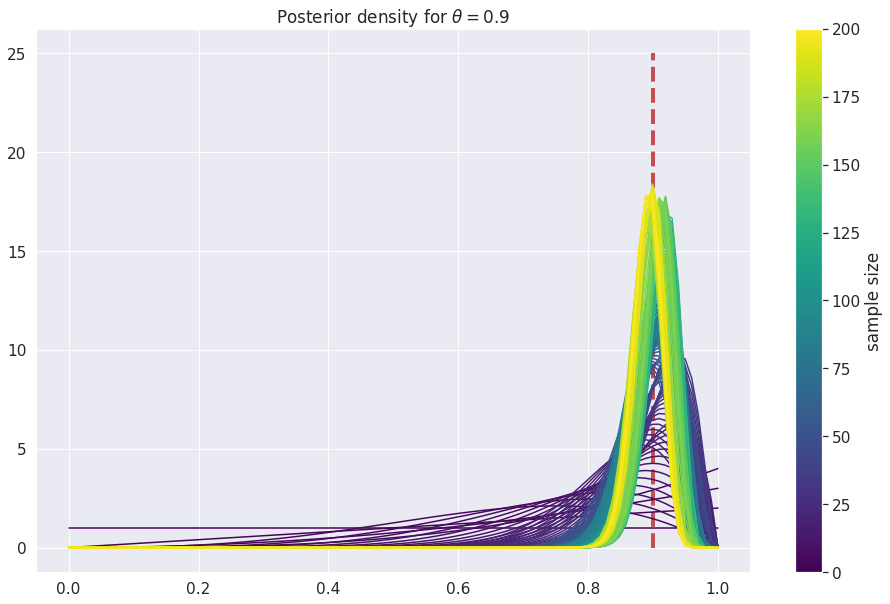

In [66]:
x = np.linspace(0, 1, 100)
sns.set(style="darkgrid", font_scale=1.4)
palette = sns.color_palette("viridis", n_colors=SAMPLE_SIZE)
plt.figure(figsize=(16, 10))
be = BayesEstimator()
for i in range(bern_samples.shape[-1]):
    estimator = be.get_estimator(bern_samples[2][:i])
    apost_sample = estimator.pdf(x)
    plt.plot(x, apost_sample, color=palette[i])
    
    means[2, i] = estimator.mean()
    lower_bound[2, i] = estimator.ppf(alpha/2)
    upper_bound[2, i] = estimator.ppf(1 - alpha/2)
    
norm = colors.Normalize(0, SAMPLE_SIZE)

plt.colorbar(cm.ScalarMappable(norm=norm, cmap="viridis"), label="sample size")
plt.title(r"Posterior density for $\theta = 0.9$")
plt.vlines(0.9, 0, 25, linestyle="dashed", colors="r", linewidth=4)
plt.show()

**Характеристики апостериорного распределения**

$mean = \dfrac{1 + \sum X_i}{2 + n}$  

$mode = \overline{X}$  

$var = \dfrac{n + 1 + n \cdot \sum X_i - (\sum X_i)^2}{(n + 2)^2(n + 3)} $

$mode - mean = \dfrac{2\overline{X} - 1}{n + 2}$

Постройте график среднего для апостериорного распределения и 95% доверительный интервал для всех выборок в зависимости от $n$ (каждая выборка своим цветом). Интервал для какой выборки почти для всех $n$ самый узкий? С чем это связано?

**Ответ:** Исходя из вышеприведённых формул и графиков можно заключить следующее:  
1) При больщих значениях n параметр бернулиевского распределения приблизительно равен моде апостериорного распределения  
2) С увеличением размера выборки уменьшается дисперсия апост. распр., засчёт чего большая доля вероятности содержится в интервале малой длины  
3) Дисперсия будет минимальна при значениях $\sum X_i$, близких к крайним значениям (ибо числитель является квадратичной ф-ией от $\sum X_i$)

ДИ для выборки с $\theta = 0.9$ самый узкий, так как $\sum X_i$ наиболее близка к одному из краевых значений по сравнению с остальными выборками, и благодаря этому из пункта 3) получаем, что дисперсия минимальна, а значит и длина ДИ тоже.

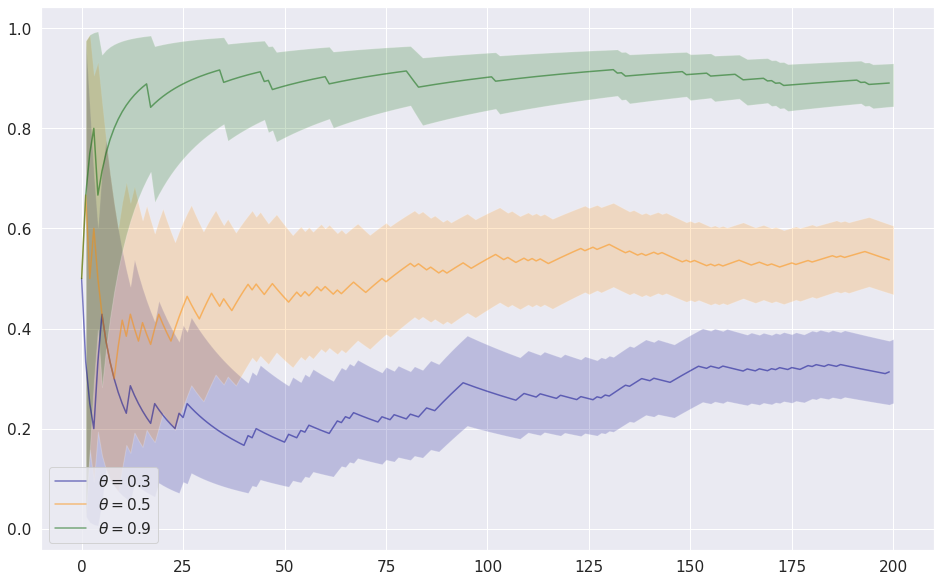

In [79]:
x = np.arange(1, SAMPLE_SIZE+1)
theta_colors = ['darkblue', 'darkorange', 'darkgreen']

plt.figure(figsize=(16, 10))

for i in range(3):
    plt.plot(means[i], color=theta_colors[i], alpha=0.5,
             label=f'$ \\theta = {thetas[i]}$')
    plt.fill_between(x, lower_bound[i], upper_bound[i], alpha=0.2, 
                     facecolor=theta_colors[i])
    
plt.grid(True)
plt.legend()
plt.show()

б) Раздающий на экзамене.

Представьте, что вы раздающий на экзамене который принимают два преподавателя. Так уж случилось, что вы знаете все оценки, которые ставят преподаватели. У каждого из преподавателей есть плохое и хорошее настроение, которое может внезапно меняться (заранее предугадать нельзя). Настроение находится в интервале $(0;1)$ и является вероятности поставить положительную оценку. Ваша задача выбрать к какому из преподавателей направлять студентов каждый раз. Считаем, что студент может получить только положительную оценку (1) или отрицательную (0). Считаем, что вы добрый раздающий и что если один или больше из преподавателей сидит без дела, то это нормально. 

In [17]:
import numpy as np
from scipy import stats as sps

from matplotlib import pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", font_scale=1.4)


class Professor:
    def __init__(self, mood=0.5):
        self.mood = mood

    def step(self) -> int:
        return sps.bernoulli(self.mood).rvs()

In [18]:
np.random.seed(42)
PROFESSORS_CNT = 10
professors = [Professor(mood=sps.uniform().rvs()) for i in range(PROFESSORS_CNT)]

Итак, будем считать, что у нас есть 1000 студентов (для более точного подсчета). 
Начнем с простого. Давайте попробуем случайно распределять студентов.

In [25]:
alphas = np.ones(10)
betas = np.ones(10)

num_students = 10000

cum_retakes_random = []

for i in range(num_students):
    idx = np.random.randint(PROFESSORS_CNT)
    cur_est = professors[idx].step()
    if cur_est == 1:
        alphas[idx] += 1
    else:
        betas[idx] += 1
    cum_retakes_random.append(betas.sum() - PROFESSORS_CNT)
        
print(f"Вероятность сдать: {(alphas.sum() - PROFESSORS_CNT)/num_students}")

Вероятность сдать: 0.5216


Давайте попробуем улучшить наш алгоритм. Будем брать случайного преподавателя с вероятностью $\varepsilon$, а с вероятностью $(1-\varepsilon)$ выбирать преподавателя, который с наибольшей вероятностью поставит студенту положительную оценку на текущий момент.

![](https://i.ibb.co/nPDLfJ2/2020-11-16-19-16-11.png)

Для нас $r_t \in \{0;1\}$ -- результат экзамена.

In [26]:
eps = 0.05
# 1 - random professor, 0 - "best" professor
professor_chooser = sps.bernoulli(eps)

alphas = np.ones(PROFESSORS_CNT)
betas = np.ones(PROFESSORS_CNT)

num_students = 10000

cum_retakes_greedy = []

for i in range(num_students):
    expected_values = alphas / (alphas + betas)
    best_professor_ind = expected_values.argmax()
    rand_ind = np.random.randint(PROFESSORS_CNT)
    ind = rand_ind if professor_chooser.rvs() else best_professor_ind
    
    cur_est = professors[ind].step()
    if cur_est == 1:
        alphas[ind] += 1
    else:
        betas[ind] += 1
    
    cum_retakes_greedy.append(betas.sum() - PROFESSORS_CNT)
        
print(f"Вероятность сдать: {(alphas.sum() - PROFESSORS_CNT)/num_students}")

Вероятность сдать: 0.9267


Теперь давайте попробуем поступать следующим образом. Для каждого принимающего будем хранить апостериорное распрееления (в виде параметров $\alpha$ и $\beta$ для бета-распределения). На каждой из итераций будем сэмплировать одно число из этих распределений и выберем преподователя с максимальным засэмплированым числом.

Подробнее:

![](https://i.ibb.co/HC2rXHm/2020-11-16-19-12-29.png)



In [27]:
alphas = np.ones(PROFESSORS_CNT)
betas = np.ones(PROFESSORS_CNT)

cum_retakes_bayes = []

for i in range(num_students):
    sample = sps.beta(alphas, betas).rvs()
    ind = sample.argmax()
    
    cur_est = professors[ind].step()
    if cur_est == 1:
        alphas[ind] += 1
    else:
        betas[ind] += 1
        
    cum_retakes_bayes.append(betas.sum() - PROFESSORS_CNT)
        
print((alphas.sum() - PROFESSORS_CNT)/num_students)

0.9488


Постройте график в котором по оси $x$ отложено число студентов (число наблюдений), а по оси $y$ число пересдач на момент, соотвтствующий числу наблюдений.

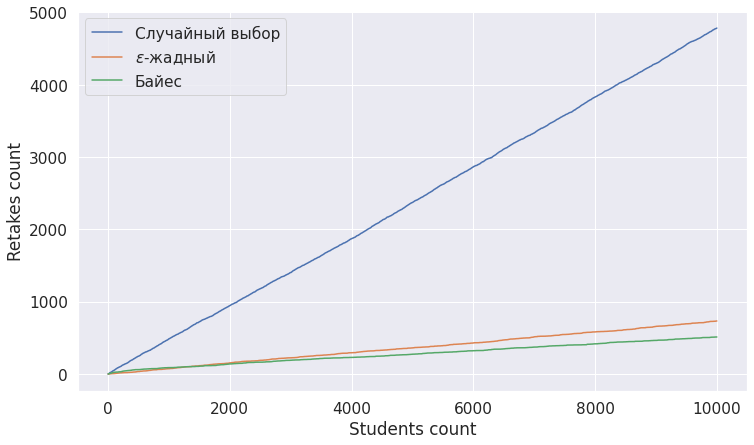

In [28]:
plt.figure(figsize=(12, 7))

x = np.arange(1, num_students+1)

plt.plot(x, cum_retakes_random, label="Случайный выбор")
plt.plot(x, cum_retakes_greedy, label="$ \\varepsilon $-жадный")
plt.plot(x, cum_retakes_bayes, label="Байес")

plt.xlabel("Students count")
plt.ylabel("Retakes count")
plt.grid(True)
plt.legend()
plt.show()

Какая стратегия проявила себя лучше остальных? Как вы думаете, почему?  

**Ответ:** Лучше себя прояаила байесовская стратегия, поскольку засчёт большого числа измерений апостериорное распределение знает примерное значение параметра берн. распр.: на поздних итерациях генерируемые значения очень близки к моде, равной $\overline{X}$, которая по ЦПТ близка к истинному значению параметра с точностью $O(1 / \sqrt n)$

Какую стратегию стоит выбирать в зависимости от числа наблюдений (если у нас 10, 50, 100, 1000 студентов)? Постройте графики с соответсвующими `plt.xlim` чтобы ответить на этот вопрос.


**Ответ:** При малом числе наблюдений (до 20) лучше использовать первую стратегию, поскольку остальные методы используют полученный ранее опыт, который ещё достаточно мал.  

Если же число наблюдений лежит в интервале $(20, 3000)$, то жадная стратегия показывает себя лучше всего.  
<i>Предположение</i>: при таком числе наблюдений информация о распределении будет не полной, и из-за этого сэмплирование показывает более низкий результат.  

При более больших значениях $n$ байесовская стратегия значительно выделяется по качеству. На мой взгляд, это связано с тем, что в жадной стратегии используется информация о выборочном среднем, в то время как в байесовской стратегии получаем больше информации за счёт семплирования из бета-распределения.  
Так как при $\overline{X} > 0.5 \:\:\: mode > mean$, то, семплируя из распределения, мы более вероятно выберем преподавателя с наибольшим "коэффициентом халявности" 

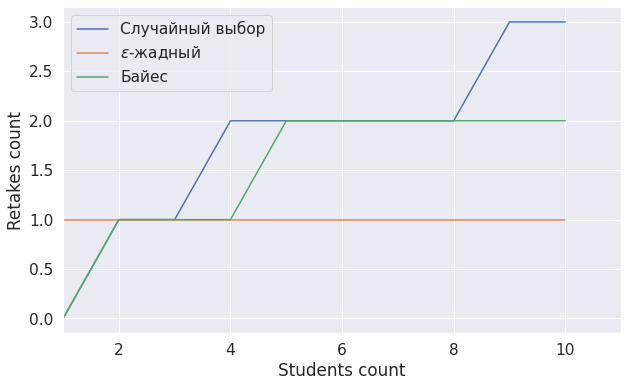

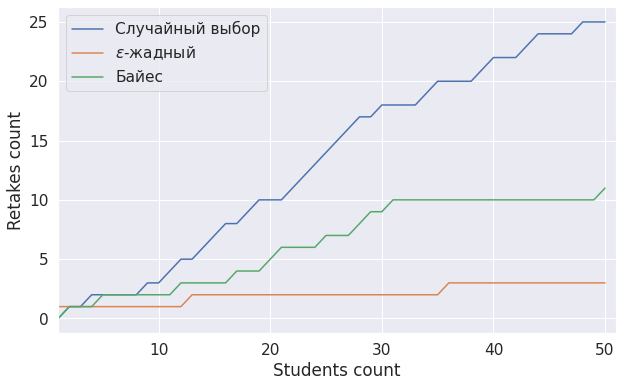

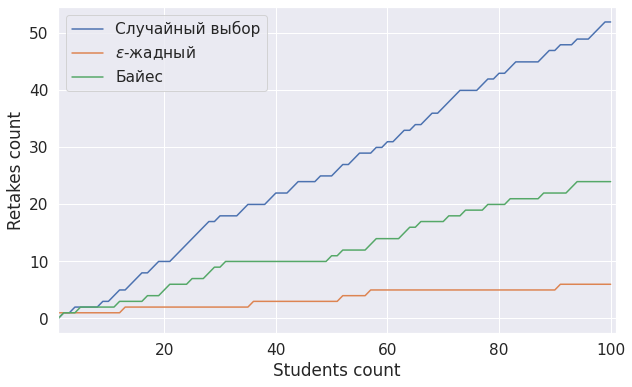

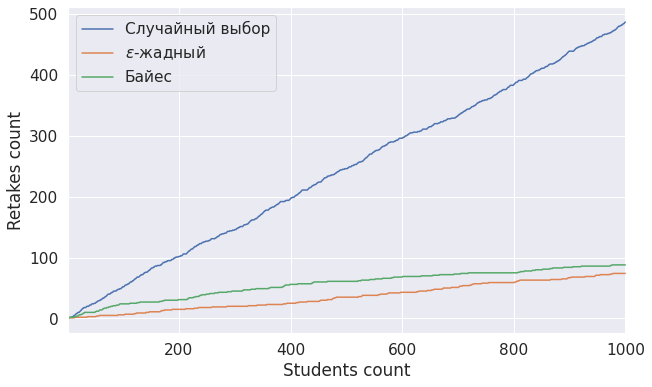

In [29]:
for k_students in (10, 50, 100, 1000):
    plt.figure(figsize=(10, 6))

    x = np.arange(1, k_students+1)

    plt.plot(x, cum_retakes_random[:k_students], label="Случайный выбор")
    plt.plot(x, cum_retakes_greedy[:k_students], label="$ \\varepsilon $-жадный")
    plt.plot(x, cum_retakes_bayes[:k_students], label="Байес")

    plt.xlim(1, k_students+1)
    plt.xlabel("Students count")
    plt.ylabel("Retakes count")
    plt.grid(True)
    plt.legend()
    plt.show()

## Задание 3 (Мощность критерия) (10 баллов)

В реальной жизни аналитика самая распространенная задача это A/B-тестирование. Оно применяется практически везде, где это возможно. Идея проста: разбиваем людей на две группы A и B. Группе A мы даем продукт без изменений (принято называть эту группу `placebo`, даже когда речь не идет о медицине), а группе B (`treatment`) мы даем продукт, с каким-то изменением. Мы хотим понять, полезно ли нам предложенное изменение. Поэтому мы считаем какую-то метрику для двух этих групп и пытаемся понять, значимо ли изменение. Однако важный вопрос понять необходимый размер групп A и B.


Давайте представим себе такой случай: студент ведет два паблика с мемами. Один про лектора по статам, а другой про лектора по теории меры. Но наступает сессия, и времени у него остается немного, поэтому он думает о том чтобы закрыть первый паблик, потому что мемы в нем уже не актуальны и лайкают их мало. Вы, как опытный эксперт, можете довольно точно прикинуть распределение лайков под записями. По вашему мнению оба распределения нормальные. Для первого паблика: $\mu_1 = 35$ $\sigma_1 = 30$, для второго: $\mu_2 = 55$ $\sigma_2 = 30$. Считаем, что аудитории пабликов не пересекаются. Вы хотите убедить студента, что ему выгодно закрывать именно первый паблик и сконцентрироваться на втором, но он вам не верит и требует статистически доказать правоту: он требует, чтобы мощность критерия была не менее не менее $0.95$, а уровень значимости $\alpha = 0.05$. Вы предлагаете ему следующий сценарий: чтобы избежать влияние других факторов нужно выкладывать мемы в двух пабликах одновременно раз в день. Необходимо понять сколько дней требуется для подведения итогов.

Введем обозначения для количества лайков: $X$ ~ $N(\mu_1, \sigma^2_1)$; $Y$ ~ $N(\mu_2, \sigma^2_2)$.

Для проверки гиоптезы вы предложили воспользоваться Z-критерием для односторонней альтернативы:

$H_0: \mu_1 = \mu_2$ vs $H_1: \mu_2 > \mu_1$.

Статистика этого критерия выглядит так: $$\dfrac{\overline{Y} - \overline{X}}{\sigma / \sqrt{n}} = \dfrac{\overline{Y}}{\sigma/\sqrt{n}} - \dfrac{\overline{X}}{\sigma / \sqrt{n}}.$$

Напишите функцию которая строит плотности $\overline{X}$ и $\overline{Y}$ в зависимости от $n$ красным и синим цветом соответственно. **Не гистограмму или kde, а именно теоретическую плотность.** Так же закрасьте область соответствующую ошибке первого рода красным ($\alpha$), а ошибке второго рода синим ($\beta$) (`plt.fill_between`). В заголовке напишите мощность критерия ($1 - \beta$).

Должен получится примерно такой график:

![](https://i.ibb.co/m032vj1/Unknown-3.png)



In [5]:
def plot_power_and_pvalue(
    n: int = 100, 
    mu_1: float = 35, 
    mu_2: float = 55, 
    sigma_1: float = 30, 
    sigma_2: float = 30, 
    alpha: float = 0.05,
    show: bool = True,
):
    assert mu_1 < mu_2
    assert n > 0
    sigma_n_1 = sigma_1 / np.sqrt(n)
    sigma_n_2 = sigma_2 / np.sqrt(n)
    x = np.linspace(-3*sigma_n_1, mu_2+3*sigma_n_2, 200)
    
    first_distr = sps.norm(mu_1, sigma_n_1)
    second_distr = sps.norm(mu_2, sigma_n_2)
    
    quantile = first_distr.ppf(1 - alpha)
    beta = second_distr.cdf(quantile)
    
    if show:
        max_pdf = max(first_distr.pdf(mu_1), second_distr.pdf(mu_2))
        
        plt.figure(figsize=(12, 7))
        
        plt.plot(x, first_distr.pdf(x), color="red", alpha=0.5, 
                 label="First public")
        plt.plot(x, second_distr.pdf(x), color="blue", alpha=0.5, 
                 label="Second public")
        plt.vlines(quantile, 0, max_pdf, linestyles='dashed', 
                   label=f"$ \\alpha = {alpha}$")
        
        first_tmp_xticks = np.linspace(quantile, mu_2+3*sigma_n_2, 200)
        snd_tmp_xticks = np.linspace(-3*sigma_n_1, quantile, 200) 
        
        plt.fill_between(first_tmp_xticks, np.zeros(200), 
                         first_distr.pdf(first_tmp_xticks), 
                         alpha=0.2, facecolor="red")
        plt.fill_between(snd_tmp_xticks, np.zeros(200), 
                         second_distr.pdf(snd_tmp_xticks), 
                         alpha=0.2, facecolor="blue")
        
        plt.title(f"Мощность критерия = {1.0 - beta}")
        plt.legend()
        plt.show()
    else:
        plt.close()
    
    return beta

Запустите функцию с параметрами по умолчанию для проверки.

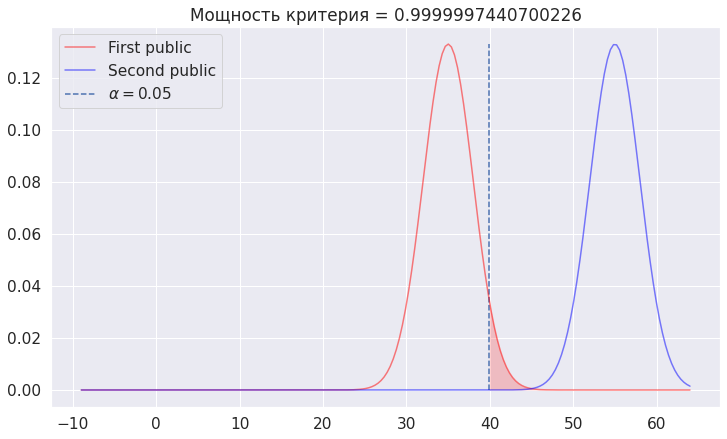

2.55929977464261e-07

In [6]:
plot_power_and_pvalue()

Теперь поиграйтесь с ползунком.

In [7]:
from ipywidgets import interactive
from IPython import display


v = interactive(
    lambda n: plot_power_and_pvalue(n), n=(10, 100)
)


In [8]:
display.display(v)

interactive(children=(IntSlider(value=55, description='n', min=10), Output()), _dom_classes=('widget-interact'…

Сколько дней нужно для достижения мощности критерия $\geq 0.95$ на уровне $\alpha=0.05$?

**Ответ:** 25